# Predictive Analysis : Prediksi Penyakit Jantung

Nama : Nisrina Fatimah Parisya


ID Cohort :MC006D5X1393

## Data  Loading

Pada tahapan pertama, saya mengambil dataset dari website Kaggle dengan nama ***common heart disease data 4 hospital*** dan menggunakan library pandas serta menggunakan fungsi` read_csv()` untuk mengunggah dataset yang akan di proses.

Dataset ini terdiri dari 920 baris dan 14 kolom dimana 13 kolom tersebut memiliki tipe data float , 1 kolom integer dan 1 kolom kategorikal.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denysskyrda/common-heart-disease-data-4-hospitals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/common-heart-disease-data-4-hospitals


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [3]:
df = pd.read_csv("/kaggle/input/common-heart-disease-data-4-hospitals/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,1.6,7.0,1,switzerland
916,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,0.8,7.0,1,switzerland
917,72.0,1.0,3.0,160.0,0.0,0.2,2.0,114.0,0.0,1.6,2.0,2.0,6.2,0,switzerland
918,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,1.0,3.0,1,switzerland


## Data Undertanding

Dataset yang digunakan merupakan dataset berjudul "Common Heart Disease (4 Hospitals)  yang dapat diakses melalui kaggle dengan link berikut ini [Common Heart Disease Dataset]( https://www.kaggle.com/datasets/denysskyrda/common-heart-disease-data-4-hospitals). Dataset ini terdiri dari 920 Baris dengan data pasien dengan parameter berupa variabel yang relevan dengan penyakit jantung.

**Kondisi Data**
* Tidak ditemukan missing value pada 920 baris dan 15 kolom data.
* Ditemukan 2 data duplikat yang telah dihapus.
* Outlier terdeteksi pada variabel trestbps dan chol, dan berhasil ditangani menggunakan metode IQR+Median Replacement.

**Fitur yang terdapat pada setiap kolom dataset**:

*   age – Usia pasien
*   sex – Jenis kelamin (1 = laki-laki, 0 = perempuan)
* cp – Jenis nyeri dada
* trestbps – Tekanan darah saat istirahat
* chol – Kadar kolesterol dalam darah (mg/dl)
* fbs – Gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak)
* restecg – Hasil elektrokardiogram saat istirahat
* thalach – Detak jantung maksimum yang dicapai
* exang – Angina (nyeri dada) yang dipicu oleh olahraga (1 = ya, 0 = tidak)
* oldpeak – Depresi segmen ST (nilai positif, dibulatkan)
* slope – Kemiringan segmen ST saat latihan
* ca – Jumlah pembuluh darah utama yang terlihat melalui fluoroskopi
* thal – Hasil tes thalassemia
* target – Kehadiran penyakit jantung (1 = ada penyakit, 0 = tidak ada penyakit)

**Insight**


- Outlier ditemukan pada variabel trestbps (tekanan darah) dan chol (kolesterol) dengan nilai 0 yang tidak normal secara medis, dan berhasil dikoreksi menggunakan metode IQR+Median Replacement.
- Korelasi tinggi ditemukan antara cp (nyeri dada), exang (nyeri dada saat olahraga), oldpeak, thal, dan ca dengan target variable, mengindikasikan fitur penting untuk prediksi.
- Mayoritas data numerik menunjukkan distribusi mendekati normal, mendukung penggunaan algoritma linear.
- Kolom Source Tag tidak digunakan dalam pemodelan karena hanya menunjukkan asal rumah sakit data.


### Exploratory Data Analysis (EDA)

###### Cek ukuran data

Tahapan ini dilakukan untuk memahami isi dataset. hal pertama yang dilakukan adalah memahami dan mengecek isi dari dataset dengan menggunakan `.shape', .info() `dan `.describe()`









In [4]:
df.shape

(920, 15)

Dalam Cell diatas ini dapat kita ketahui bahwa dataset terdiri dari 920 barus data dengan 15 kolom

##### Cek Informasi Data

In [5]:
# Melihat info dataset untuk mengetahui tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   exang     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    float64
 11  ca        920 non-null    float64
 12  thal      920 non-null    float64
 13  target    920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 107.9+ KB


berdasarkan output tersebut kita dapat mengetahui ada beberapa jenis data


*   12 Kolom dengan tipe data float dengan kategori numerik untuk kolom age, sex, cp, trestbos,chil,cfbs,resrecgh,thalach,exang,oldpeak,slope,ca,thal
*   1 Kolom integer untuk label target dengan nama kolom target yang didalamnya terdapat angka 0 yang artinya pasien tidak memiliki tanda tanda penyakit jantung dan angka 1 yang artinya pasien memiliki tanda tanda penyakit jantung
* 1 Kolom kategorikal dengan data berupa nama rumah sakit dimana data tersebut diambil. Namun karena disini saya berfokus pada prediksi penyakitnya kolom tersebut akan saya hapus






##### Cek Statistik Deskriptif Dataset

pada df.describe() disini kita dapat mengecek isi data secara statistik deskriptif dan menganalisis apakah ada kemungkinan kesalahan data. dari iyang kita lihat diatas ada beberapa kemungkinan data yang mengalami outlier diantaranya


*   trestbps (tekanan darah) : alasannya karena tekanan darah di nilai 0 pada kolom min sangat tidak normal dalam medis
*   chol (kolesterol) : alasannya karena kolesterol berada di nilai 0 pada kolom min sangat tidak normal dalam medis



In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.268478,199.640870,0.176304,0.604348,136.889565,0.394783,0.910478,1.757609,0.778913,5.371522,0.553261
std,9.424685,0.408148,0.930969,18.569153,109.240114,0.357484,0.804978,25.438033,0.477178,1.039830,0.539280,0.667765,1.508660,0.497426
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,177.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.200000,0.200000,3.800000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,0.800000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.200000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#### Cek Missing Value

pada tahapan ini kita dapat melakukan pengecekan missing value dalam dataset tersebut diantaranya menggunakan funsgi .`isnull().sum()` untuk mengetahui missing value di setiap kolom

In [7]:
# Jumlah nilai yang hilang per kolom
missing_values = df.isnull().sum()
print("Cek Missing Value:")
print(missing_values)

Cek Missing Value:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
source      0
dtype: int64


Berdasarkan output diatas tidak ditemukan adanya missing value, maka dari itu kita tidak perlu melakukan eksekusi drop atau mengisi nilai NaN pada data karena semua data terisi dengan baik

#### Pengecekan Duplicate Data

Pada tahapan ini kita dapat melakukan pengecekan duplikasi data dengan df.`duplicated().sum(). `Setelah melakukan pengecekan ternyata terdapat data yang mengalami duplikasi sebanyak 2 duplikasi data.

In [8]:
# cek duplikasi data
print("Cek Duplikasi Data:")
print(f"Jumlah duplikasi data sebelum dihapus: {df.duplicated().sum()}")

Cek Duplikasi Data:
Jumlah duplikasi data sebelum dihapus: 2


#### Distribusi Data

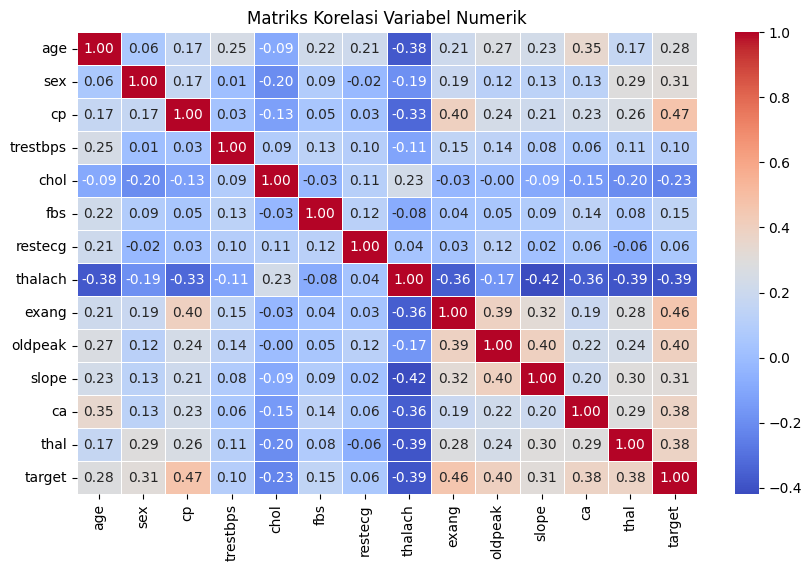

In [10]:
# Analisis Korelasi
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_data.corr().round(2)

# Heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

Hasil Correlation Map diatas beberikan beberapa informasi yaitu


*   Fitur yang sangat berkorelasi dengan label target adalah cp (nyeri dada), exang (nyeri dada saat berolahraga), oldpeak, thal (hasil tes thalassemia) dan ca (jumlah pembuluh darah)
*   Pada hasil tersebut dapat dilihat bahwa jenis kelamin laki laki (sex=1) memiliki resiko penyakit jantung yang lebih tinggi dibandingkan perempuan



## Data Preparation

#### Pembersihan Fitur
Berikutnya saya akan menghapus kolom source yang berisi nama RS data penyakit ini diambil, alasannya karena fokus saya disini hanya untuk kebutuhan analisis diagnosis

In [11]:
df = df.drop('source', axis=1)

#### Handling Duplicate Data

Sebagaimana setelah melakukan pengecekan data dapat kita lihat bahwa ada 2 data yang mengalami duplikasi sehingga diperlukan adanya penghapusan data duplikat menggunakan fungsi `.drop_duplicates()`

In [12]:
# Hapus duplikasi data
df = df.drop_duplicates()

print(f"Jumlah duplikasi data setelah dihapus: {df.duplicated().sum()}")

# Cek ukuran data setelah menghapus duplikasi
print(f"Jumlah baris data setelah menghapus duplikasi: {len(df)}")

Jumlah duplikasi data setelah dihapus: 0
Jumlah baris data setelah menghapus duplikasi: 918


#### Bagi pengelompokan jenis data

pada tahapan ini saya mengecek tipe data terhadap kolom yang akan di gunakan untuk permodelan, disini saya menggunakan `df.select_dtypes(include=['number']).columns.tolist()` dan `df.select_dtypes(include=['object']).columns.tolist()`. dapat dilihat pada output dibawah kode tersebut apa saja kolom dengan tipe data numerik. dan untuk kolom kategorikal kosong karena pada dataset memang hanya membutuhkan kolom numerikal untuk proses

In [13]:
# Mengecek tipe data setiap kolom dan mengelompokkannya
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Kolom Numerikal:")
print(numerical_cols)
print("\nKolom Kategorikal:")
categorical_cols

Kolom Numerikal:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Kolom Kategorikal:


[]

#### Data Splitting

Tahapan ini merupakan tahapan sebelum memasuki permodelan. Langkah yang saya lakukan diantaranya :
* Karena data yang saya gunakan disini sudah berformat numerik dan sudah terdapat label pada data maka saya tidak melakukan Label Encoding.
* Disini saya membagi dataset menjadi data latih (train) sebesar 80% dan data uji (testing) sebesar 20%

In [14]:
# Bagi dataset menjadi training (80%) dan testing (20%)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek ukuran data
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (734, 13), Testing set: (184, 13)


#### Normalisasi Data

Langkah kedua pada tahapan ini saya melakukan normalisasi menggunakan `StandardScaler()` dengan tujuan meningkatkan hasil prediksi lebih akurat dan stabil



In [15]:
# normalisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Langkah berikutnya saya membuat kolom label kategorikal untuk identifikasi prediksi penyakit jantung

In [16]:
# Mapping nilai target ke label
df['target_label'] = df['target'].map({1: 'Mengidap Penyakit Jantung', 0: 'Tidak Mengidap Penyakit Jantung'})

# Menampilkan jumlah data berdasarkan label target
df['target_label'].value_counts()

,count
target_label,
Mengidap Penyakit Jantung,508
Tidak Mengidap Penyakit Jantung,410


<ipython-input-17-549dd4452f3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_label', data=df, palette='viridis')


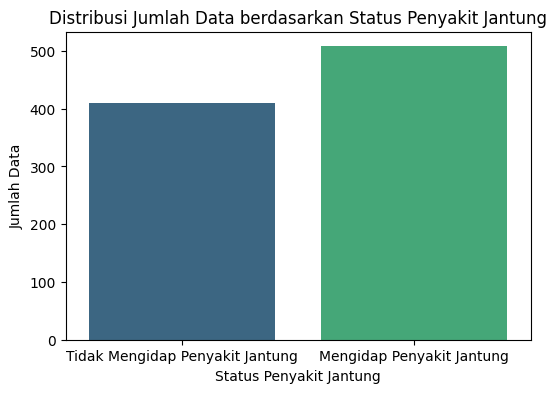

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='target_label', data=df, palette='viridis')
plt.title('Distribusi Jumlah Data berdasarkan Status Penyakit Jantung')
plt.xlabel('Status Penyakit Jantung')
plt.ylabel('Jumlah Data')
plt.show()

## Model Development

Pada tahap ini, tiga algoritma machine learning diimplementasikan untuk menyelesaikan masalah klasifikasi, yaitu Random Forest, Logistic Regression, dan K-Nearest Neighbors (KNN). Setiap model dievaluasi menggunakan metrik akurasi dan F1-Score untuk menentukan performa terbaik.

### 1. Random Forest

#### Cara Kerja

Random Forest adalah algoritma ensemble learning yang menggabungkan multiple decision trees untuk membuat prediksi yang lebih akurat dan stabil. Algoritma ini bekerja dengan cara:
- Bootstrap Sampling: Membuat beberapa subset data training secara random dengan replacement
- Feature Randomness: Pada setiap node split, hanya subset random dari features yang dipertimbangkan  
- Tree Construction: Membangun decision tree untuk setiap subset data
- Voting Mechanism: Untuk klasifikasi, menggunakan majority voting dari semua trees

#### Parameter:

- random_state=42
- n_estimators=100 (default)
- max_depth=None (default)
- min_samples_split=2 (default)
- min_samples_leaf=1 (default)

#### Tahapan Penyusunan Model:

1. Dataset dibagi menjadi data latih dan uji (X_train, X_test, y_train, y_test).
2. Model RandomForestClassifier diinisialisasi dengan parameter random_state=42.
3. Model dilatih pada X_train dan y_train menggunakan metode fit().
4. Prediksi dilakukan pada X_test menggunakan metode predict().
5. Evaluasi dilakukan dengan membandingkan y_pred_dt dengan y_test.

#### Kelebihan:

- Mengurangi overfitting dibanding pohon keputusan tunggal
- Mampu menangani data non-linear
- Menyediakan informasi feature importance
- Robust terhadap outliers dan noise

#### Kekurangan:

- Lebih lambat dibanding model sederhana
- Sulit untuk interpretasi secara keseluruhan
- Membutuhkan lebih banyak memori

#### Implementasi:

- Model dilatih langsung pada data asli tanpa normalisasi karena Random Forest tidak sensitif terhadap skala fitur
- Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten dan dapat direproduksi
- Model RandomForestClassifier diinisialisasi dan dilatih menggunakan data latih (X_train, y_train)
- Model digunakan untuk memprediksi label pada data uji (X_test)


In [18]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = rf_model.predict(X_test)

### 2. Logistic Regression

#### Cara Kerja

Logistic Regression adalah algoritma linear classifier yang menggunakan fungsi logistic (sigmoid) untuk memetakan nilai real ke probabilitas antara 0 dan 1. Cara kerja algoritma:
- Linear Combination: Menghitung kombinasi linear dari input features: z = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ
- Sigmoid Function: Mengaplikasikan fungsi sigmoid: σ(z) = 1/(1 + e^(-z))
- Probability Mapping: Mengkonversi output ke probabilitas kelas
- Decision Boundary: Menggunakan threshold (biasanya 0.5) untuk klasifikasi final

#### Parameter:

- solver='lbfgs' (default)
- max_iter=100 (default)
- C=1.0 (default)
- penalty='l2' (default)
- random_state=42

#### Tahapan Penyusunan Model:

1. Dataset dibagi menjadi data latih dan uji (X_train, X_test, y_train, y_test).
2. Model LogisticRegression diinisialisasi dengan parameter random_state=42.
3. Model dilatih pada X_train dan y_train menggunakan metode fit().
4. Prediksi dilakukan pada X_test menggunakan metode predict().
5. Evaluasi dilakukan dengan membandingkan hasil prediksi dengan y_test.

#### Kelebihan:

- Sederhana dan cepat dalam training dan prediksi
- Memberikan probabilitas output yang dapat diinterpretasi
- Tidak memerlukan tuning parameter yang kompleks
- Efisien untuk dataset besar
- Memberikan koefisien yang dapat diinterpretasi

#### Kekurangan:

- Hanya cocok untuk masalah yang linearly separable
- Sensitif terhadap outliers
- Memerlukan feature scaling untuk performa optimal
- Tidak dapat menangkap hubungan non-linear tanpa feature engineering

#### Implementasi:

- Model menggunakan solver 'lbfgs' yang cocok untuk dataset kecil hingga menengah.
- Parameter C=1.0 digunakan untuk mengontrol kekuatan regularisasi, di mana nilai yang lebih kecil berarti regularisasi yang lebih kuat.
- Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten dan dapat direproduksi.
- Model LogisticRegression diinisialisasi dan dilatih menggunakan data latih (X_train, y_train).
- Model digunakan untuk memprediksi label pada data uji (X_test).
- Menggunakan random_state=42 untuk memastikan reproducibility hasil

In [19]:
from sklearn.linear_model import LogisticRegression
# Inisialisasi dan latih model Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

### 3. K-Nearest Neighbors

#### Cara Kerja

KNN adalah algoritma lazy learning yang melakukan klasifikasi berdasarkan kedekatan dengan data training. Proses kerja algoritma:
- Distance Calculation: Menghitung jarak antara data test dengan semua data training
- Neighbor Selection: Memilih k tetangga terdekat berdasarkan jarak yang dihitung
- Majority Voting: Menggunakan voting mayoritas dari k tetangga untuk menentukan kelas
- Tie Breaking: Menangani kasus seri dengan aturan tertentu

#### Parameter:
- n_neighbors=5 (default)
- weights='uniform' (default)
- algorithm='auto' (default)
- metric='minkowski' (default)
- p=2 (default)

#### Tahapan Penyusunan Model:

1. Data fitur (X) dinormalisasi menggunakan StandardScaler karena KNN sensitif terhadap skala data.
2. Dataset dibagi menjadi data latih dan uji (X_train, X_test, y_train, y_test).
3. Model KNeighborsClassifier diinisialisasi dengan parameter default.
4. Model dilatih pada X_train_scaled dan y_train.
5. Prediksi dilakukan pada X_test_scaled dan evaluasi dengan y_test.

#### Kelebihan:

- Sederhana dan mudah diimplementasikan
- Tidak memerlukan asumsi tentang distribusi data
- Baik untuk menangkap hubungan lokal antar data
- Efektif untuk dataset dengan pola yang kompleks

#### Kekurangan:

- Sensitif terhadap skala data (diperlukan normalisasi)
- Performa menurun jika jumlah data besar atau berdimensi tinggi
- Tidak memberikan interpretasi fitur
- Komputasi prediksi lambat untuk dataset besar

#### Implementasi:

- Model KNeighborsClassifier digunakan dengan parameter default, yaitu n_neighbors=5 dan metrik jarak Euclidean.
- Model dilatih menggunakan data latih X_train dan y_train.
- Prediksi dilakukan pada data uji X_test dan hasilnya disimpan dalam y_pred_knn.


In [20]:
from sklearn.neighbors import KNeighborsClassifier
# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

## Evaluation

### Evaluasi Hasil

Evaluasi model yang dilakukan untuk prediksi data ini menggunakan metrik Akurasi dan F1-Score.

Berdasarkan hasil analisis yang didapatkan dari ketiga model tersebut masing masing model memiliki akurasi serta F1 score yang tinggi dan sangat baik dalam memprediksi dataset perbedaan dan penjelasan untuk masing masing permodelan, dari semua proses yang didapatkan terdapat beberapa kesimpulan diantaranya :     



Random Forest

* Memiliki akurasi sebesar 84,23 % dan weighted F1-score sebesar 0.8414, menunjukkan performa yang stabil dan baik.
* Dapat memprediksi dengan baik pada kelas mayoritas (pasien sakit), dengan recall tinggi sebesar 0.89 untuk kelas 1.


In [21]:
# Evaluasi Model Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_report = classification_report(y_test, rf_y_pred, zero_division=1)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print("\n=== Random Forest ===")
print(f'Accuracy: {rf_accuracy}')
print(f'Weighted F1-Score: {rf_f1}')
print('Classification Report:\n', rf_report)


=== Random Forest ===
Accuracy: 0.842391304347826
Weighted F1-Score: 0.8414920969496837
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Logistic Regression

* Mencapai akurasi sebesar 82.06% dan weighted F1-score sebesar 0.8199
* Memiliki recall tertinggi (0.86) untuk kelas 1 (pasien sakit), menunjukkan kemampuan yang sangat baik dalam mendeteksi pasien sakit.
* Model ini tergolong sederhana dan interpretable, namun tetap memberikan hasil prediksi yang sangat baik.

In [22]:
# Evaluasi Model Logistic Regression
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')
lr_report = classification_report(y_test, lr_y_pred, zero_division=1)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

print("\n=== Logistic Regression ===")
print(f'Accuracy: {lr_accuracy}')
print(f'Weighted F1-Score: {lr_f1}')
print('Classification Report:\n', lr_report)


=== Logistic Regression ===
Accuracy: 0.8206521739130435
Weighted F1-Score: 0.8199775484650921
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        82
           1       0.82      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



K-Nearest Neighbours

* Memberikan akurasi sebesar 84,2% dan weighted F1-score sebesar 0.8414, yang setara dnegan hasil random forest.
* Recall yang tinggi (0.89) untuk kelas 1 membuatnya cocok untuk kasus di mana deteksi positif sangat penting.

In [23]:
# Evaluasi Model KNN
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_report = classification_report(y_test, knn_y_pred, zero_division=1)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

print("=== KNN ===")
print(f'Accuracy: {knn_accuracy}')
print(f'Weighted F1-Score: {knn_f1}')
print('Classification Report:\n', knn_report)

=== KNN ===
Accuracy: 0.842391304347826
Weighted F1-Score: 0.8414920969496837
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### Evaluasi Bisnis

#### Problem Solving
1. **Bagaimana cara mengembangkan model machine learning yang dapat memprediksi risiko penyakit jantung?**  
   Problem berhasil dijawab melalui pengembangan dan evaluasi tiga model klasifikasi:
   - **Random Forest** mencapai akurasi 84% dan F1-score 0.842
   - **Logistic Regression** akurasi 83% dan F1-score 0.820
   - **K-Nearest Neighbors (KNN)** akurasi 84% dan F1-score 0.842

   Ketiganya menunjukkan performa yang baik, dan proses mencakup:
   - Praproses data secara menyeluruh
   - Pemilihan algoritma yang relevan
   - Evaluasi metrik klasifikasi (precision, recall, F1-score)


2. **Bagaimana Hasil Prediksi yang dilakukan? Permodelan apa yang paling efektif untuk digunakan?**  
   Telah dijawab melalui:
   - Evaluasi hasil menunjukkan bahwa random forest dan knn memiliki tingkat akurasi dan skor f1 paling tinggi dan stabil


### Capaian Goals

1. **Model prediksi risiko penyakit jantung**  
   Tercapai. Model Random Forest dan KNN menjadi pilihan terbaik dari sisi akurasi dan F1-score. Logistic Regression menjadi alternatif baik karena recall yang tinggi dan interpretabilitas.

2. **Identifikasi faktor risiko penyakit jantung**  
   Tercapai. Insight dari EDA dan analisis fitur menunjukkan keterkaitan kuat antara faktor medis (seperti chol, cp, thalach, dan age) dengan risiko penyakit jantung.

### Dampak dari Solusi yang Dirancang

- **Evaluasi multi-model** memberikan dasar kuat untuk pemilihan model terbaik
- **Random Forest** dan **KNN** unggul dari sisi akurasi dan generalisasi
- **Random Forest** dan **KNN** menunjukkan recall tinggi (0.89), ideal untuk aplikasi medis di mana deteksi positif lebih diutamakan
- **Logistic Regression** juga memiliki angka recall yang cukup ideal di angka 0,86

## Kesimpulan

Model yang dikembangkan telah berhasil menjawab seluruh problem statement dan mencapai goals yang ditetapkan. Dari keseluruhan model, **Random Forest** dan **KNN** merupakan model terbaik untuk diterapkan pada dataset ini karena memiliki akurasi dan F1-Score tertinggi, yaitu Accuracy sebesar **0.8423** dan F1-Score sebesar **0.8414**.

Secara keseluruhan, evaluasi menunjukkan bahwa solusi yang diimplementasikan berdampak positif terhadap kualitas prediksi dan akurasi sistem deteksi dini penyakit jantung, serta layak digunakan sebagai alat bantu dalam proses **screening penyakit jantung** di bidang medis.
